# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [76]:
#kmr weatherpy workbook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [77]:
# Test to determine if the API key and url are working before gettign too far down the road
# Build query URL and request your results in Celsius
url = "http://api.openweathermap.org/data/2.5/weather?"
town = "Burundi"
# Get weather data
xquery_url = url + "appid=" + api_key + "&q=" + town
# Get temperature from JSON response
weather_response = requests.get(xquery_url).json()
weather_json = weather_response['main']['temp']
# Report temperature
print(f"The weather API responded with: {weather_json}.")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

The weather API responded with: 291.14.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


## Generate Cities List

In [78]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
fullset = len(cities)
print("The number of randomly generated cities in the project scope")
print(fullset)
#print(cities)

The number of randomly generated cities in the project scope
599


In [79]:
# Build a data frame to capture each cities weather information
cities_df = {
    "City": cities,
}
cities_df = pd.DataFrame(cities_df)
print("Exhibit 1a: Cities in the project with a place to capture weather data")

# set up additional columns to hold information
cities_df['Lat'] = ""
cities_df['Lng'] = ""
cities_df['Temp Max'] = ""
cities_df['Humidity'] = ""
cities_df['Cloudiness'] = ""
cities_df['Wind Speed'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df.head()

Exhibit 1a: Cities in the project with a place to capture weather data


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,,,,,,,,
1,mataura,,,,,,,,
2,westport,,,,,,,,
3,qaanaaq,,,,,,,,
4,nikolskoye,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [80]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

counter = 0

# Loop through the list of cities and perform a request for data on each
print("Checkpoint: Confirmation listing of cities processed through OpenWeather Site")

for index, row in cities_df.iterrows():
    cityname = row['City']
    counter = counter + 1
    
    if counter >= 61:
        print("**Done running the first batch**")
        break
    
    if counter <= 60:
        time.sleep(1)
        print(f"Processing Record {counter} of {fullset}. City = {cityname}")
        
        try:
            response = requests.get(query_url + cityname).json()   
            cities_df.loc[index, 'Lat'] = response['coord']['lat']
            cities_df.loc[index, 'Lng'] = response['coord']['lon']
            cities_df.loc[index, 'Temp Max'] = response['main']['temp_max']
            cities_df.loc[index, 'Humidity'] = response['main']['humidity']
            cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
            cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
            cities_df.loc[index, 'Country'] = response['sys']['country']
            cities_df.loc[index, 'Date'] = response['dt']
         
        except (KeyError, IndexError, ValueError):
            print(f"... skipped over  " + cityname + "  because it lacked sufficient information")
            #cities_df.remove(cityname)
            pass

# First attempt structure going to lists instead of dataframes
# Create lists to capture date for use in data frame
#cities = ['London', 'xxToronto','nanortalik', 'haines junction', 'ancud', 'mikkeli', 'daru', 'vaini', 'bethel', 'vostok']
#cities = cities
# lat = []
# lng = []
# temp_max = []
# humidity = []
# cloudiness = []
# wind_speed = []
# country = []
# date = []
#for city in cities:
#             lat.append(response['coord']['lat'])
#             lng.append(response['coord']['lon'])
#             temp_max.append(response['main']['temp_max'])
#             humidity.append(response['main']['humidity'])
#             cloudiness.append(response['clouds']['all'])
#             wind_speed.append(response['wind']['speed'])
#             country.append(response['sys']['country'])
#             date.append(response['dt'])


Checkpoint: Confirmation listing of cities processed through OpenWeather Site
Processing Record 1 of 599. City = vaini
Processing Record 2 of 599. City = mataura
Processing Record 3 of 599. City = westport
Processing Record 4 of 599. City = qaanaaq
Processing Record 5 of 599. City = nikolskoye
Processing Record 6 of 599. City = ushuaia
Processing Record 7 of 599. City = prigorodnyy
Processing Record 8 of 599. City = umm durman
... skipped over  umm durman  because it lacked sufficient information
Processing Record 9 of 599. City = goderich
Processing Record 10 of 599. City = katobu
Processing Record 11 of 599. City = poum
Processing Record 12 of 599. City = pisco
Processing Record 13 of 599. City = rikitea
Processing Record 14 of 599. City = sabha
Processing Record 15 of 599. City = butaritari
Processing Record 16 of 599. City = kayerkan
Processing Record 17 of 599. City = saldanha
Processing Record 18 of 599. City = tramore
Processing Record 19 of 599. City = ostrowiec swietokrzyski
P

Processing Record 158 of 599. City = puerto ayora
Processing Record 159 of 599. City = natori
Processing Record 160 of 599. City = corowa
Processing Record 161 of 599. City = abu samrah
Processing Record 162 of 599. City = comodoro rivadavia
Processing Record 163 of 599. City = peniche
Processing Record 164 of 599. City = amderma
... skipped over  amderma  because it lacked sufficient information
Processing Record 165 of 599. City = taragual
Processing Record 166 of 599. City = buin
Processing Record 167 of 599. City = rodez
Processing Record 168 of 599. City = kruisfontein
Processing Record 169 of 599. City = longyearbyen
Processing Record 170 of 599. City = ballina
Processing Record 171 of 599. City = praya
Processing Record 172 of 599. City = arraial do cabo
Processing Record 173 of 599. City = upernavik
Processing Record 174 of 599. City = chokurdakh
Processing Record 175 of 599. City = tashtyp
Processing Record 176 of 599. City = chakradharpur
Processing Record 177 of 599. City = 

Processing Record 317 of 599. City = iturama
Processing Record 318 of 599. City = nabire
Processing Record 319 of 599. City = karaul
... skipped over  karaul  because it lacked sufficient information
Processing Record 320 of 599. City = yamada
Processing Record 321 of 599. City = isangel
Processing Record 322 of 599. City = san ignacio
Processing Record 323 of 599. City = tiksi
Processing Record 324 of 599. City = tsihombe
... skipped over  tsihombe  because it lacked sufficient information
Processing Record 325 of 599. City = belaya gora
Processing Record 326 of 599. City = kisesa
Processing Record 327 of 599. City = miri
Processing Record 328 of 599. City = erdenet
Processing Record 329 of 599. City = tsiroanomandidy
Processing Record 330 of 599. City = karwar
Processing Record 331 of 599. City = coos bay
Processing Record 332 of 599. City = salima
Processing Record 333 of 599. City = raudeberg
Processing Record 334 of 599. City = nishihara
Processing Record 335 of 599. City = ukiah


Processing Record 466 of 599. City = qui nhon
Processing Record 467 of 599. City = camacha
Processing Record 468 of 599. City = yakshur-bodya
... skipped over  yakshur-bodya  because it lacked sufficient information
Processing Record 469 of 599. City = santa rosa
Processing Record 470 of 599. City = kovdor
Processing Record 471 of 599. City = san pedro
Processing Record 472 of 599. City = chabahar
Processing Record 473 of 599. City = nandi
Processing Record 474 of 599. City = armacao dos buzios
... skipped over  armacao dos buzios  because it lacked sufficient information
Processing Record 475 of 599. City = praia
Processing Record 476 of 599. City = namibe
Processing Record 477 of 599. City = la ronge
Processing Record 478 of 599. City = slave lake
Processing Record 479 of 599. City = krasnovishersk
Processing Record 480 of 599. City = sampit
Processing Record 481 of 599. City = namatanai
Processing Record 482 of 599. City = vilyuysk
Processing Record 483 of 599. City = lobez
Processi

In [6]:
cities_df = cities_df.dropna(how='any')
cities_df.head()

NameError: name 'cities_df' is not defined

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# #Export the randomly generated list of cities to to a csv file
cities_df.to_csv("output_data/1ex_citiesroster.csv", index=False, header=True)

# Create a data frame from the response lists

# dictionary = {
#     "City": cities,
#     "Lat": lat,
#     "Lng": lng,
#     "Temp Max": temp_max,
#     "Humidity": humidity,
#     "Cloudiness": cloudiness,
#     "Wind Speed": wind_speed,
#     "Country": country,
#     "Date": date
# }
# dictionary = pd.DataFrame(dictionary)
# print("Exhibit 2: Table with in scope cities and their weather data")
# dictionary.head()

NameError: name 'cities_df' is not defined

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [83]:
# Inspect and remove cities with humidity greater than 100%
print("Exhibit 3: Table with in scope cities and their weather data. (Note: Cities with humidity >100% removed)")
cities_df["Humidity"]= pd.to_numeric(cities_df["Humidity"])
dehumidified = cities_df.loc[cities_df["Humidity"] <= 100]
dehumidified.head()

Exhibit 3: Table with in scope cities and their weather data. (Note: Cities with humidity >100% removed)


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2,-175.2,21,77.0,20,5.1,TO,1603213506
1,mataura,-46.19,168.86,5.56,89.0,96,0.43,NZ,1603213708
2,westport,41.14,-73.36,19.44,82.0,90,1.5,US,1603213770
3,qaanaaq,77.48,-69.36,-5.25,84.0,0,3.7,GL,1603213800
4,nikolskoye,59.7,30.79,2.78,88.0,75,4,RU,1603213801


In [84]:
print("Exhibit 4: List of cities removed from project because humidity was greater than 100% (blank if none)")
humidoutliers = cities_df.loc[cities_df["Humidity"] > 100]
humidoutliers.head()

Exhibit 4: List of cities removed from project because humidity was greater than 100% (blank if none)


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date


In [85]:
# Export the data frame to a csv file
dehumidified.to_csv("output_data/3ex_cleancitydata.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

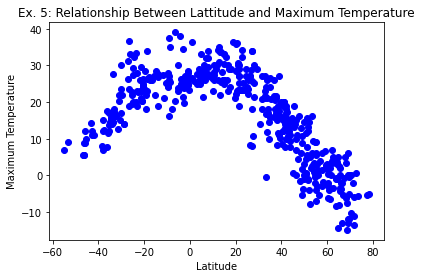

In [86]:
# Compare latitude to temperature
x_axis = dehumidified["Lat"]
y_axis = dehumidified["Temp Max"]
   
plt.title("Ex. 5: Relationship Between Lattitude and Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")

plt.scatter(x_axis, y_axis, marker="o", color="blue")

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regress_values = x_axis * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(x_axis,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.savefig("output_data/5chart_lat2temp.png")
plt.show()
# print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
# print(f"The line equation is as follows:  {line_eq}")

## Latitude vs. Humidity Plot

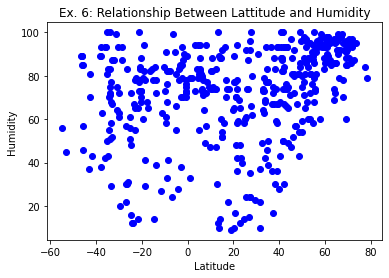

In [87]:
# Compare latitude to humidity
x_axis = dehumidified["Lat"]
y_axis = dehumidified["Humidity"]
   
plt.title("Ex. 6: Relationship Between Lattitude and Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(x_axis, y_axis, marker="o", color="blue")

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regress_values = x_axis * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(x_axis,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.savefig("output_data/6chart_lat2humidity.png")
plt.show()
# print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
# print(f"The line equation is as follows:  {line_eq}")

## Latitude vs. Cloudiness Plot

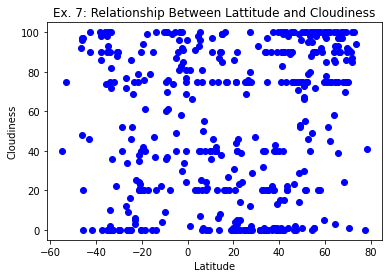

In [88]:
# Compare latitude to cloudiness
x_axis = dehumidified["Lat"]
y_axis = dehumidified["Cloudiness"]
   
plt.title("Ex. 7: Relationship Between Lattitude and Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(x_axis, y_axis, marker="o", color="blue")

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# regress_values = x_axis * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.plot(x_axis,regress_values,"r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.savefig("output_data/7chart_lat2cloudiness.png")
plt.show()
# print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
# print(f"The line equation is as follows:  {line_eq}")

## Latitude vs. Wind Speed Plot

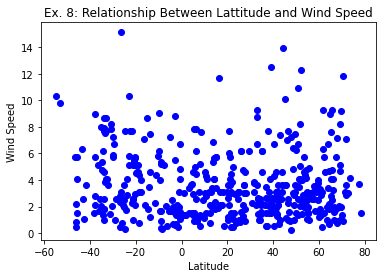

In [95]:
# Compare latitude to wind speed
x_axis = dehumidified["Lat"]
y_axis = dehumidified["Wind Speed"]
   
plt.title("Ex. 8: Relationship Between Lattitude and Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(x_axis, y_axis, marker="o", color="blue")

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# regress_values = x_axis * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.plot(x_axis,regress_values,"r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.savefig("output_data/8chart_lat2windspeed.png")
plt.show()
# print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
# print(f"The line equation is as follows:  {line_eq}")

## Linear Regression

In [1]:
# See above

In [2]:
# Build a northern hemisphere data frame
northern = dehumidified.loc[dehumidified["Lat"] >= 0]
print("Exhibit 9: Table of cities at or north of equator. (Note: humidity confimred at <= 100%")
northern.head()

NameError: name 'dehumidified' is not defined

In [3]:
# Build a southern hemisphere data frame
southern = dehumidified.loc[dehumidified["Lat"] < 0]
print("Exhibit 10: Table of cities south of equator. (Note: humidity confimred at <= 100%)")
southern.head()

NameError: name 'dehumidified' is not defined

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [4]:
#Compare latitude to temperature

x_axis = northern["Lat"]
y_axis = northern["Temp Max"]
   
plt.title("Ex. 11: Northern Hemisphere / Relationship Between Lattitude and Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")

plt.scatter(x_axis, y_axis, marker="o", color="blue")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.savefig("output_data/11chart_lat2temp.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

NameError: name 'northern' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [5]:
# Compare latitude to temperature

x_axis = southern["Lat"]
y_axis = southern["Temp Max"]
   
plt.title("Ex. 12: Southern Hemisphere / Relationship Between Lattitude and Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")

plt.scatter(x_axis, y_axis, marker="o", color="blue")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("output_data/12chart_lat2temp.png")
plt.show()

print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

NameError: name 'southern' is not defined

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression